In [8]:
from split_data import split
import numpy as np
import torch
from torchvision.datasets import ImageFolder
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

from utils import *
from convert_MLModel import convert_to_mlmodel


In [9]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using {device}")

Using cuda


In [10]:
source_path = "../Combined_data"
training_path = "../Combined_train_test/train"
testing_path = "../Combined_train_test/test"
train_test_ratio = 0.7
split(source_path, training_path, testing_path, train_test_ratio) 

Finish splitting Apple_Black_rot
[Training Samples:700, Testing Samples:300]   Original Samples:1000
---------------------
Finish splitting Apple_Cedar_apple_rust
[Training Samples:700, Testing Samples:300]   Original Samples:1000
---------------------
Finish splitting Apple_Healthy
[Training Samples:1151, Testing Samples:494]   Original Samples:1645
---------------------
Finish splitting Apple_scab
[Training Samples:700, Testing Samples:300]   Original Samples:1000
---------------------
Finish splitting Early_blight
[Training Samples:700, Testing Samples:300]   Original Samples:1000
---------------------
Finish splitting Grape_Black_rot
[Training Samples:826, Testing Samples:354]   Original Samples:1180
---------------------
Finish splitting Grape_Esca_Black_Measles
[Training Samples:968, Testing Samples:415]   Original Samples:1383
---------------------
Finish splitting Grape_Healthy
[Training Samples:700, Testing Samples:300]   Original Samples:1000
---------------------
Finish spli

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.3235295].


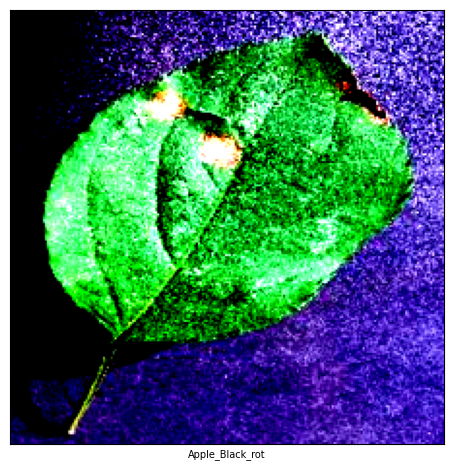

In [11]:
# -------------[transform into suitable size for transfer learning]--------------------
transformation = preprocess()

train_dataset = ImageFolder(training_path, transform = transformation)

test_dataset = ImageFolder(testing_path,transform = transformation)

classes = train_dataset.classes

#display the first image in the dataset
display_img(*train_dataset[0], classes)

In [12]:
batch_size = 128
train_val_ratio = 0.8
val_size = int(np.round(len(train_dataset) * (1-train_val_ratio)))
train_size = len(train_dataset) - val_size 

train_data, val_data = random_split(train_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size, num_workers = 4, pin_memory = True)

test_dl = DataLoader(test_dataset, batch_size, num_workers = 4, pin_memory = True)

Length of Train Data : 18066
Length of Validation Data : 4517


### EfficientB0 Model 

In [13]:
efficient_model = load_efficient_net().to(device)

num_classes = len(classes)

efficient_model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=num_classes, bias=True)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(efficient_model.parameters(), lr=0.005)

# efficientNet B0 model
efficient_results = train(model=efficient_model,
                train_dataloader=train_dl,
                val_dataloader=val_dl,
                optimizer=optimizer,
                loss_fn=loss_fn,
                epochs=15,
                device=device)

torch.save(efficient_model, "../temp_models/combined_efficient_model.pt")

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\AFFLatus/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100.0%
  7%|▋         | 1/15 [01:49<25:33, 109.50s/it]

Epoch: 1 | train_loss: 0.3548 | train_acc: 0.8933 | train_f1: 0.8937 | val_loss: 0.4553 | val_acc: 0.9271 | val_f1: 0.9267 | 
--------------------------------------------------------------


 13%|█▎        | 2/15 [03:28<22:25, 103.47s/it]

Epoch: 2 | train_loss: 0.1643 | train_acc: 0.9483 | train_f1: 0.9484 | val_loss: 0.2329 | val_acc: 0.9297 | val_f1: 0.9294 | 
--------------------------------------------------------------


 20%|██        | 3/15 [05:08<20:18, 101.55s/it]

Epoch: 3 | train_loss: 0.0915 | train_acc: 0.9693 | train_f1: 0.9694 | val_loss: 0.1006 | val_acc: 0.9653 | val_f1: 0.9657 | 
--------------------------------------------------------------


 27%|██▋       | 4/15 [06:41<18:00, 98.25s/it] 

Epoch: 4 | train_loss: 0.0704 | train_acc: 0.9774 | train_f1: 0.9783 | val_loss: 0.1474 | val_acc: 0.9583 | val_f1: 0.9575 | 
--------------------------------------------------------------


 33%|███▎      | 5/15 [08:14<16:06, 96.61s/it]

Epoch: 5 | train_loss: 0.0750 | train_acc: 0.9763 | train_f1: 0.9765 | val_loss: 0.1820 | val_acc: 0.9540 | val_f1: 0.9542 | 
--------------------------------------------------------------


 40%|████      | 6/15 [09:47<14:18, 95.39s/it]

Epoch: 6 | train_loss: 0.0679 | train_acc: 0.9789 | train_f1: 0.9795 | val_loss: 0.0656 | val_acc: 0.9828 | val_f1: 0.9830 | 
--------------------------------------------------------------


 47%|████▋     | 7/15 [11:19<12:34, 94.29s/it]

Epoch: 7 | train_loss: 0.0587 | train_acc: 0.9815 | train_f1: 0.9813 | val_loss: 0.0525 | val_acc: 0.9827 | val_f1: 0.9834 | 
--------------------------------------------------------------


 53%|█████▎    | 8/15 [12:51<10:53, 93.30s/it]

Epoch: 8 | train_loss: 0.0390 | train_acc: 0.9871 | train_f1: 0.9870 | val_loss: 0.0505 | val_acc: 0.9831 | val_f1: 0.9838 | 
--------------------------------------------------------------


 60%|██████    | 9/15 [14:22<09:16, 92.67s/it]

Epoch: 9 | train_loss: 0.0466 | train_acc: 0.9866 | train_f1: 0.9865 | val_loss: 0.0679 | val_acc: 0.9828 | val_f1: 0.9830 | 
--------------------------------------------------------------


 67%|██████▋   | 10/15 [15:56<07:45, 93.01s/it]

Epoch: 10 | train_loss: 0.0348 | train_acc: 0.9894 | train_f1: 0.9893 | val_loss: 0.1102 | val_acc: 0.9745 | val_f1: 0.9745 | 
--------------------------------------------------------------


 73%|███████▎  | 11/15 [17:24<06:06, 91.73s/it]

Epoch: 11 | train_loss: 0.0399 | train_acc: 0.9873 | train_f1: 0.9872 | val_loss: 0.1290 | val_acc: 0.9650 | val_f1: 0.9659 | 
--------------------------------------------------------------


 80%|████████  | 12/15 [19:02<04:40, 93.44s/it]

Epoch: 12 | train_loss: 0.0238 | train_acc: 0.9937 | train_f1: 0.9940 | val_loss: 0.0920 | val_acc: 0.9748 | val_f1: 0.9754 | 
--------------------------------------------------------------


 87%|████████▋ | 13/15 [20:40<03:09, 95.00s/it]

Epoch: 13 | train_loss: 0.0809 | train_acc: 0.9762 | train_f1: 0.9764 | val_loss: 0.1021 | val_acc: 0.9714 | val_f1: 0.9719 | 
--------------------------------------------------------------


 93%|█████████▎| 14/15 [22:19<01:35, 95.96s/it]

Epoch: 14 | train_loss: 0.0466 | train_acc: 0.9864 | train_f1: 0.9870 | val_loss: 0.2142 | val_acc: 0.9474 | val_f1: 0.9469 | 
--------------------------------------------------------------


100%|██████████| 15/15 [23:58<00:00, 95.91s/it]

Epoch: 15 | train_loss: 0.0581 | train_acc: 0.9822 | train_f1: 0.9821 | val_loss: 0.0716 | val_acc: 0.9807 | val_f1: 0.9814 | 
--------------------------------------------------------------


In [15]:
# accuracy for efficientNet b0
if torch.backends.mps.is_available():
    efficient_model = torch.load("../temp_models/combined_efficient_model.pt", map_location=torch.device('mps'))
elif torch.cuda.is_available():
    efficient_model = torch.load("../temp_models/combined_efficient_model.pt", map_location=torch.device('cuda'))
    
efficient_report = test_run(efficient_model, test_dl, device, classes)
print(efficient_report)

C:\Users\AFFLatus\AppData\Local\Temp\ipykernel_24556\267469297.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  efficient_model = torch.load("../temp_models/combined_effi

                               precision    recall  f1-score   support

              Apple_Black_rot       1.00      1.00      1.00       300
       Apple_Cedar_apple_rust       0.99      1.00      0.99       300
                Apple_Healthy       1.00      0.97      0.99       494
                   Apple_scab       0.96      1.00      0.98       300
                 Early_blight       0.96      0.97      0.97       300
              Grape_Black_rot       0.99      0.99      0.99       354
     Grape_Esca_Black_Measles       0.99      1.00      0.99       415
                Grape_Healthy       0.97      1.00      0.98       300
            Grape_Leaf_blight       1.00      0.99      0.99       323
                    No_leaves       0.99      0.99      0.99       343
          Potato_Early_blight       0.95      1.00      0.97       300
               Potato_Healthy       1.00      0.97      0.99       300
           Potato_Late_blight       0.98      1.00      0.99       300
     

### MobileV2 Model

In [16]:
mobile_model = load_mobile_net().to(device)

mobile_model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features=num_classes, bias=True)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mobile_model.parameters(), lr=0.005)

# MobileNet V2 model
mobile_results = train(model=mobile_model,
                train_dataloader=train_dl,
                val_dataloader=val_dl,
                optimizer=optimizer,
                loss_fn=loss_fn,
                epochs=15,
                device=device)

torch.save(mobile_model, "../temp_models/combined_mobile_model.pt")

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to C:\Users\AFFLatus/.cache\torch\hub\checkpoints\mobilenet_v2-7ebf99e0.pth
100.0%
  7%|▋         | 1/15 [01:12<16:52, 72.31s/it]

Epoch: 1 | train_loss: 0.3806 | train_acc: 0.8819 | train_f1: 0.8832 | val_loss: 0.3283 | val_acc: 0.9142 | val_f1: 0.9141 | 
--------------------------------------------------------------


 13%|█▎        | 2/15 [02:24<15:42, 72.49s/it]

Epoch: 2 | train_loss: 0.1781 | train_acc: 0.9423 | train_f1: 0.9423 | val_loss: 0.1755 | val_acc: 0.9447 | val_f1: 0.9447 | 
--------------------------------------------------------------


 20%|██        | 3/15 [03:37<14:27, 72.31s/it]

Epoch: 3 | train_loss: 0.0984 | train_acc: 0.9698 | train_f1: 0.9699 | val_loss: 0.2140 | val_acc: 0.9317 | val_f1: 0.9314 | 
--------------------------------------------------------------


 27%|██▋       | 4/15 [04:48<13:12, 72.09s/it]

Epoch: 4 | train_loss: 0.1159 | train_acc: 0.9637 | train_f1: 0.9638 | val_loss: 0.2502 | val_acc: 0.9374 | val_f1: 0.9367 | 
--------------------------------------------------------------


 33%|███▎      | 5/15 [05:59<11:56, 71.63s/it]

Epoch: 5 | train_loss: 0.0722 | train_acc: 0.9760 | train_f1: 0.9762 | val_loss: 0.2986 | val_acc: 0.9166 | val_f1: 0.9154 | 
--------------------------------------------------------------


 40%|████      | 6/15 [07:10<10:42, 71.44s/it]

Epoch: 6 | train_loss: 0.0803 | train_acc: 0.9762 | train_f1: 0.9767 | val_loss: 0.1135 | val_acc: 0.9672 | val_f1: 0.9666 | 
--------------------------------------------------------------


 47%|████▋     | 7/15 [08:22<09:33, 71.71s/it]

Epoch: 7 | train_loss: 0.0853 | train_acc: 0.9730 | train_f1: 0.9729 | val_loss: 0.1196 | val_acc: 0.9670 | val_f1: 0.9675 | 
--------------------------------------------------------------


 53%|█████▎    | 8/15 [09:35<08:23, 71.89s/it]

Epoch: 8 | train_loss: 0.0523 | train_acc: 0.9837 | train_f1: 0.9836 | val_loss: 0.3188 | val_acc: 0.9242 | val_f1: 0.9243 | 
--------------------------------------------------------------


 60%|██████    | 9/15 [10:47<07:12, 72.02s/it]

Epoch: 9 | train_loss: 0.0602 | train_acc: 0.9818 | train_f1: 0.9823 | val_loss: 0.1904 | val_acc: 0.9501 | val_f1: 0.9502 | 
--------------------------------------------------------------


 67%|██████▋   | 10/15 [12:00<06:00, 72.20s/it]

Epoch: 10 | train_loss: 0.0766 | train_acc: 0.9764 | train_f1: 0.9773 | val_loss: 0.4820 | val_acc: 0.8929 | val_f1: 0.8924 | 
--------------------------------------------------------------


 73%|███████▎  | 11/15 [13:13<04:50, 72.55s/it]

Epoch: 11 | train_loss: 0.1090 | train_acc: 0.9664 | train_f1: 0.9662 | val_loss: 0.0621 | val_acc: 0.9806 | val_f1: 0.9807 | 
--------------------------------------------------------------


 80%|████████  | 12/15 [14:26<03:38, 72.71s/it]

Epoch: 12 | train_loss: 0.0252 | train_acc: 0.9916 | train_f1: 0.9919 | val_loss: 0.0489 | val_acc: 0.9844 | val_f1: 0.9841 | 
--------------------------------------------------------------


 87%|████████▋ | 13/15 [15:41<02:26, 73.27s/it]

Epoch: 13 | train_loss: 0.0416 | train_acc: 0.9869 | train_f1: 0.9872 | val_loss: 0.1141 | val_acc: 0.9713 | val_f1: 0.9712 | 
--------------------------------------------------------------


 93%|█████████▎| 14/15 [16:52<01:12, 72.71s/it]

Epoch: 14 | train_loss: 0.0403 | train_acc: 0.9874 | train_f1: 0.9873 | val_loss: 0.3888 | val_acc: 0.9081 | val_f1: 0.9090 | 
--------------------------------------------------------------


100%|██████████| 15/15 [18:04<00:00, 72.27s/it]

Epoch: 15 | train_loss: 0.0412 | train_acc: 0.9866 | train_f1: 0.9865 | val_loss: 0.0707 | val_acc: 0.9784 | val_f1: 0.9785 | 
--------------------------------------------------------------


In [17]:
# MobileNet V2 accuracy
if torch.backends.mps.is_available():
    mobile_model = torch.load("../temp_models/combined_mobile_model.pt", map_location=torch.device('mps'))
elif torch.cuda.is_available():
    mobile_model = torch.load("../temp_models/combined_mobile_model.pt", map_location=torch.device('cuda'))
    

mobile_report = test_run(mobile_model, test_dl, device, classes)
print(mobile_report)

C:\Users\AFFLatus\AppData\Local\Temp\ipykernel_24556\4044987031.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mobile_model = torch.load("../temp_models/combined_mobile

                               precision    recall  f1-score   support

              Apple_Black_rot       0.98      1.00      0.99       300
       Apple_Cedar_apple_rust       0.99      0.98      0.98       300
                Apple_Healthy       0.99      1.00      0.99       494
                   Apple_scab       0.99      0.99      0.99       300
                 Early_blight       0.95      0.92      0.94       300
              Grape_Black_rot       0.95      0.99      0.97       354
     Grape_Esca_Black_Measles       1.00      0.96      0.98       415
                Grape_Healthy       0.99      1.00      1.00       300
            Grape_Leaf_blight       0.98      1.00      0.99       323
                    No_leaves       1.00      1.00      1.00       343
          Potato_Early_blight       0.96      0.99      0.98       300
               Potato_Healthy       0.99      1.00      1.00       300
           Potato_Late_blight       1.00      0.93      0.96       300
     

### Predicting Single Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9295317..1.5942485].


tensor([[-25.6630, -19.1385, -18.6986, -12.1572, -13.0290,  -8.3315, -11.5355,
          -4.7233,  12.0721, -16.2637, -20.2469, -20.6656, -13.3045,  -9.5303,
         -18.6870,  -2.4310, -21.1318, -15.2726, -13.2637, -15.8621, -13.4790,
         -22.9471]], device='cuda:0')


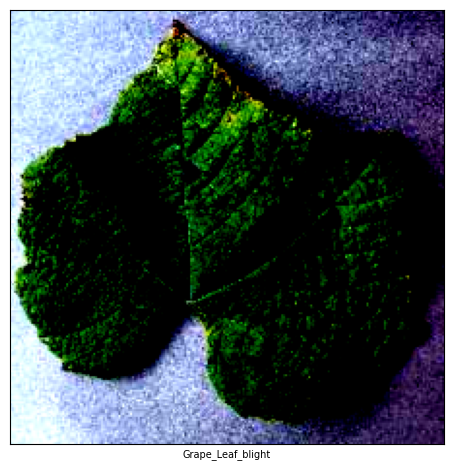

In [18]:
from PIL import Image
test_img_path = r"E:\code\Diss\Combined_train_test\test\Grape_Leaf_blight\image (2).JPG"

img = Image.open(test_img_path)


img1 = transformation(img)

display_img(img1, predict(mobile_model, test_img_path, device), classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9295317..1.5942485].


tensor([[-19.0166, -14.9697, -12.9622, -16.0940, -10.3523,   7.2427,   1.7974,
           1.7299,  20.2617, -10.5234,  -9.4242, -11.1115,  -6.6402,  -3.2895,
         -15.6627,  -6.2319, -13.1650,  -9.8140,  -1.5323,  -6.0631,  -4.2711,
         -21.6922]], device='cuda:0')


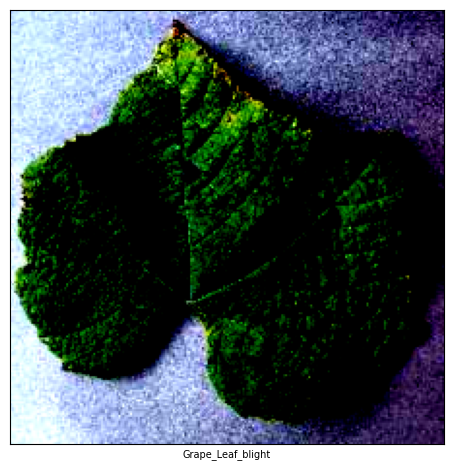

In [19]:
display_img(img1, predict(efficient_model, test_img_path, device), classes)

### Convert to ML Model


In [10]:
classes

['Apple_Apple_scab',
 'Apple_Black_rot',
 'Apple_Cedar_apple_rust',
 'Apple_Healthy',
 'Grape_Black_rot',
 'Grape_Esca',
 'Grape_Healthy',
 'Grape_Leaf_blight',
 'No_leaves',
 'Potato_Early_blight',
 'Potato_Healthy',
 'Potato_Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Mosaic_virus',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites',
 'Tomato_Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus']

In [11]:
mobile_model.to('cpu')
convert_to_mlmodel(mobile_model, classes, "combined_model",test_img_path) 

Running MIL default pipeline:   0%|          | 0/56 [00:00<?, ? passes/s]/Users/afflatus/opt/miniconda3/envs/diss/lib/python3.8/site-packages/coremltools/converters/mil/mil/passes/defs/preprocess.py:262: UserWarning: Output, '824', of the source model, has been renamed to 'var_824' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 495/495 [00:01<00:00, 408.50 ops/s] 


-------------Convert successfully-------------------
Model saved at../ML_Models/combined_model.mlmodel
-------------Testing converted model----------------
Grape_Esca
